# Machine Learning Tubes
## Linear Regression [Trayek Transportasi Umum]

In [19]:
#import Library yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [20]:
#mengambil data dari dataset [di kasus ini aku ngambil dari lokal laptopku -> tinggal disesuaikan aja kalian bukanya di local atau pake drive]
dataset = pd.read_csv("dataset trayek transportasi umum.csv")

In [21]:
#menampilkan sample dataset [5 data]
dataset.head()

,Kode trayek,Asal dan tujuan trayek,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan tertib administrasi,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
0,UBB,Ujung Baru - Bratang PP,72,5,0,0,0,2,28.194762,14.097381,12,3.6108,30.09
1,UBK,Ujung Baru - Kenjeran PP,85,14,0,0,0,2,20.341429,10.170714,12,3.0636,25.53
2,BK,Bangkingan - Karang Pilang PP,51,5,4,4,4,1,28.947619,14.473810,12,2.9700,24.75
3,C,Pasar Loak/Sedayu - Karang Menjangan PP,58,51,13,13,13,2,24.139524,12.069762,12,3.3036,27.53
4,BJ,Benowo - Kalimas PP,101,70,26,26,26,2,24.731429,12.365714,12,2.7732,23.11


# Data Pre-Processing

In [22]:
#melihat bentuk data [baris, kolom]
dataset.shape

(50, 13)

**1. Checking for missing values**

In [23]:
#pengecekan nilai null di dataset
dataset.isna().sum()

Kode trayek                                  0
Asal dan tujuan trayek                       0
Rata-rata waktu perjalanan trayek (menit)    0
Jumlah angkutan beroperasi                   0
Jumlah angkutan lulus uji KIR                0
Jumlah angkutan tertib administrasi          0
Jumlah angkutan berizin                      0
Frekuensi                                    0
Headway (menit)                              0
Waktu tunggu (menit)                         0
Kapasitas penumpang                          0
Realisasi jumlah penumpang                   0
Load factor                                  0
dtype: int64

**2. Checking for duplicate rows**

In [24]:
#pengecekan nilai duplikat di dataset
dataset.duplicated().any()

False

**3. Checking for outliers**

C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:

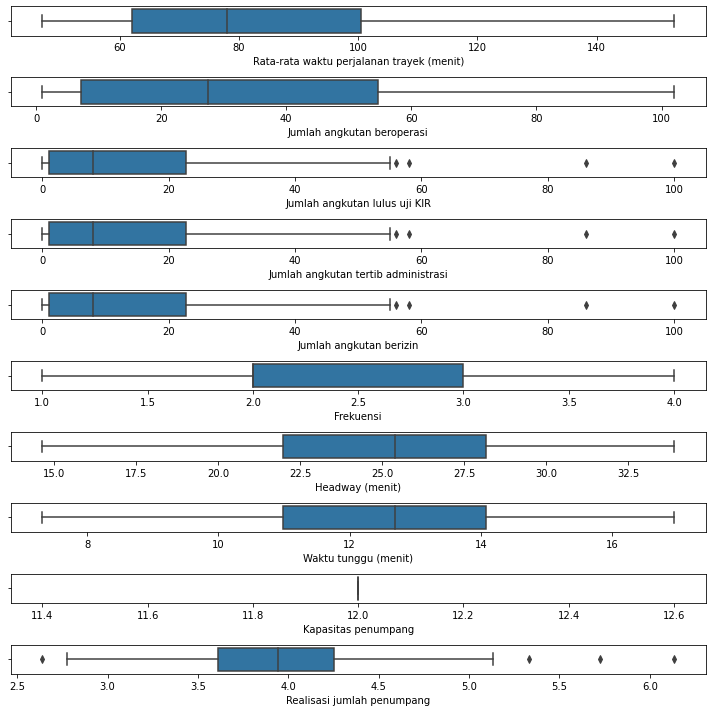

In [25]:
#pengecekan data outliers (data yang memiliki value atau karakteristik yang berbeda jauh dari data lainnya)
fig, axs = plt.subplots(10, figsize = (10,10))
plt1 = sns.boxplot(dataset['Rata-rata waktu perjalanan trayek (menit)'], ax = axs[0])
plt2 = sns.boxplot(dataset['Jumlah angkutan beroperasi'], ax = axs[1])
plt3 = sns.boxplot(dataset['Jumlah angkutan lulus uji KIR'], ax = axs[2])
plt3 = sns.boxplot(dataset['Jumlah angkutan tertib administrasi'], ax = axs[3])
plt3 = sns.boxplot(dataset['Jumlah angkutan berizin'], ax = axs[4])
plt3 = sns.boxplot(dataset['Frekuensi'], ax = axs[5])
plt3 = sns.boxplot(dataset['Headway (menit)'], ax = axs[6])
plt3 = sns.boxplot(dataset['Waktu tunggu (menit)'], ax = axs[7])
plt3 = sns.boxplot(dataset['Kapasitas penumpang'], ax = axs[8])
plt3 = sns.boxplot(dataset['Realisasi jumlah penumpang'], ax = axs[9])
plt.tight_layout()

**kesimpulan:** dari yang diliat dari subplots diatas pesebaran datanya masih normal, tidak ada data yang memiliki value yang berbeda jauh dari data lainnya. Sehingga dapat disimpulkan dalam data ini gaada data outliers.

## Stats Model

Disini kita akan ngelihat keterhubungan antara data yang ada dengan target yang ditentukan [Load Factor]

In [26]:
#import library yang dibutuhkan

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [27]:
#disini kita bagi antara tabel yang menjadi variabel [x] dan juga tabel yang menjadi target [y -> Load Factor]

x = dataset[['Rata-rata waktu perjalanan trayek (menit)', 'Jumlah angkutan beroperasi', 'Jumlah angkutan lulus uji KIR', 'Frekuensi', 'Headway (menit)', 'Waktu tunggu (menit)', 'Realisasi jumlah penumpang']]
y = dataset['Load factor']

In [28]:
#disini kita akan ngesplit datanya buat bikin konsep training testing
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)  

In [29]:
#disini kita masukkan apa aja yang dibutuhkan buat ngeliat report dari model kita buat ngecek keterhubungan antara variabel anggota dengan variabel taget

Input = sm.add_constant(x_train)
SimpleModel = sm.OLS(y_train, x_train, missing="drop")
results = SimpleModel.fit()

In [30]:
#kemudian kita print hasil rangkumannya

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            Load factor   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.417e+15
Date:                Fri, 08 Jul 2022   Prob (F-statistic):                   5.21e-212
Time:                        16:26:17   Log-Likelihood:                          443.24
No. Observations:                  35   AIC:                                     -872.5
Df Residuals:                      28   BIC:                                     -861.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------

**Kesimpulan :** nah klo kalian liat di atas yang bagian tabel [p>|t|], ada variabel yang punya nilai 1.0000, 0.999, sama 0.0000. Untuk mengeceknya itu ada standarnya, jadi untuk variabel yang memiliki nilai kurang dari 0.05 berarti variabel tersebut memiliki pengaruh yang kuat terhadap variabel target [Load Factor], begitu jg kebalikannya klo memiliki nilai lebih dari 0.05 berarti variabel tersebut memiliki pengaruh yang lemah terhadap variabel target [Load Factor]

nah, berdasarkan rangkuman diatas kan bisa kita liat variabel mana aja yang berpengaruh, yaitu ada 1 variabel [realisasi jumlah penumpang] yang berpengaruh tinggi terhadap target [Load factor]

**referensi baca summary reportnya : https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b**

# Exploratory Data Analysis
disini kita akan explore data datanya untuk liat hubungannya ke target itu positif atau negatif
kalian bisa abaikan yang step 1 sama 2

**1. Distribution of the target variable**

C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


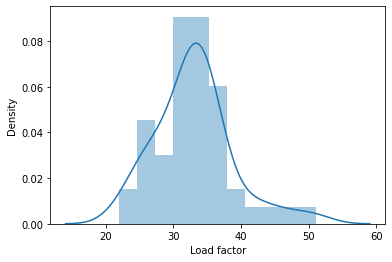

In [31]:
sns.distplot(dataset['Load factor']);

**Conclusion:** It is normally distributed

**2. How Sales are related with other variables**

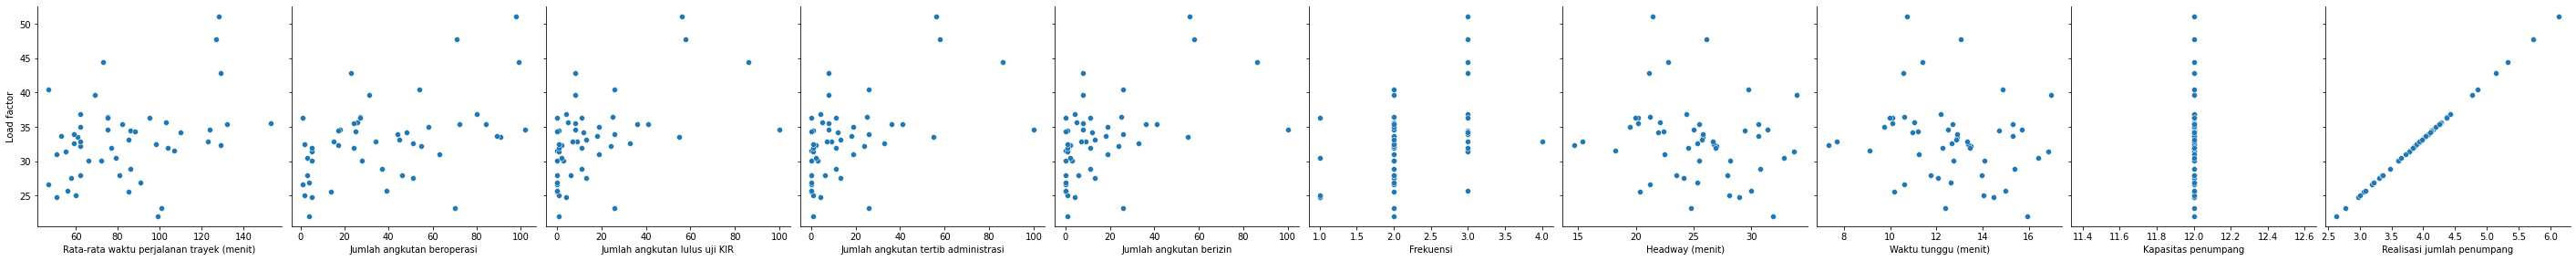

In [32]:
sns.pairplot(dataset, x_vars=['Rata-rata waktu perjalanan trayek (menit)', 'Jumlah angkutan beroperasi', 'Jumlah angkutan lulus uji KIR', 'Jumlah angkutan tertib administrasi', 'Jumlah angkutan berizin', 'Frekuensi', 'Headway (menit)', 'Waktu tunggu (menit)', 'Kapasitas penumpang', 'Realisasi jumlah penumpang'], y_vars='Load factor', height=4, aspect=1, kind='scatter')
plt.show()

**3. Memasukkan tabel tertentu di dataset**

In [33]:
data1 = dataset[['Frekuensi', 'Realisasi jumlah penumpang', 'Load factor']]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Frekuensi                   50 non-null     int64  
 1   Realisasi jumlah penumpang  50 non-null     float64
 2   Load factor                 50 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


**4. Cetak Heatmap untuk melihat hubungan variabel yang berpengaruh tinggi dengan target**

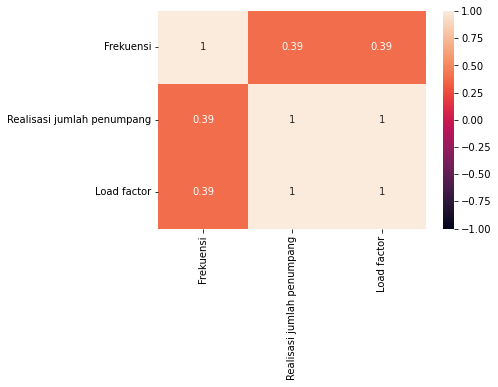

In [34]:
sns.heatmap(data1.corr(), vmin=-1, vmax=1, annot = True)
plt.show()

**5. Cetak Heatmap semua data**

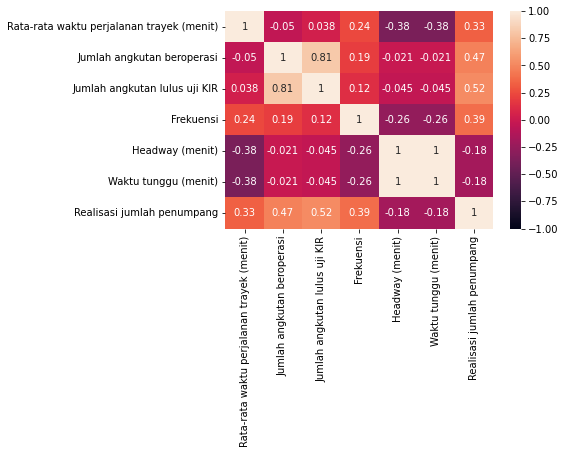

In [35]:
data2 = dataset[['Rata-rata waktu perjalanan trayek (menit)', 'Jumlah angkutan beroperasi', 'Jumlah angkutan lulus uji KIR', 'Frekuensi', 'Headway (menit)', 'Waktu tunggu (menit)', 'Realisasi jumlah penumpang']]
sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot = True)
plt.show()

hapus aja data yg NaN -> kapasitas penumpang, 
yang jumlah angkutan pilih salah satu aja yang nilainya 0.52 -> yang lain hapus aja 